In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#   **importing the necessary libraries for the model**

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
train_data_gen=ImageDataGenerator(rescale=1./255)
validation_data_gen=ImageDataGenerator(rescale=1./255)

In [11]:
train_generator=train_data_gen.flow_from_directory(
    '/kaggle/input/fer2013/train',
    target_size=(48,48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

validation_generator=validation_data_gen.flow_from_directory(
    '/kaggle/input/fer2013/test',
    target_size=(48,48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
    
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# creating the model

In [12]:

# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))





/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])


In [16]:
# Train the neural network/model
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1728219911.382960     836 service.cc:145] XLA service 0x7d1674006d00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728219911.383024     836 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728219911.383030     836 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:22:36 11s/step - accuracy: 0.0781 - loss: 1.9530

I0000 00:00:1728219918.625051     836 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


448/448 ━━━━━━━━━━━━━━━━━━━━ 149s 309ms/step - accuracy: 0.2452 - loss: 1.8318 - val_accuracy: 0.3171 - val_loss: 1.7259
Epoch 2/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.2188 - loss: 1.7790

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2188 - loss: 1.7790 - val_accuracy: 0.4000 - val_loss: 1.6988
Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.3405 - loss: 1.6781 - val_accuracy: 0.4035 - val_loss: 1.5501
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 30us/step - accuracy: 0.3750 - loss: 1.6848 - val_accuracy: 0.2000 - val_loss: 1.6549
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 40s 67ms/step - accuracy: 0.4026 - loss: 1.5465 - val_accuracy: 0.4414 - val_loss: 1.4758
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 31us/step - accuracy: 0.4062 - loss: 1.4835 - val_accuracy: 0.6000 - val_loss: 1.2940
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 29s 65ms/step - accuracy: 0.4370 - loss: 1.4700 - val_accuracy: 0.4584 - val_loss: 1.4097
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 30us/step - accuracy: 0.3750 - loss: 1.4726 - val_accuracy: 0.3000 - val_loss: 1.7718
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 36s 81ms/step - accuracy: 0.4585 - loss: 1.4110 - val_accuracy: 0.

In [ ]:
# Continue training the model for another 20 epochs
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=20,  # Train for 20 more epochs
        validation_data=validation_generator,
        validation_steps=7178 // 64)


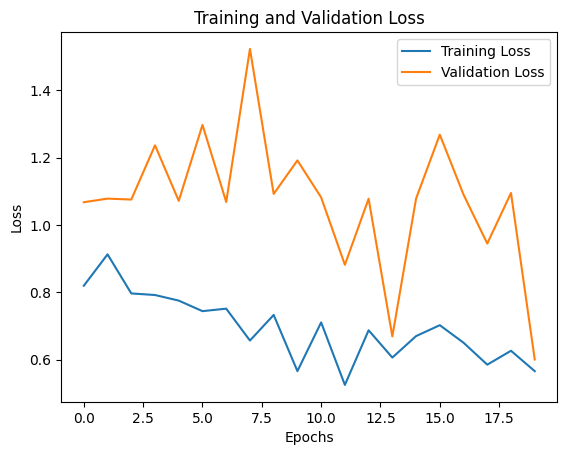

In [19]:
import matplotlib.pyplot as plt
# Plotting the training and validation loss
plt.plot(emotion_model_info.history['loss'], label='Training Loss')
plt.plot(emotion_model_info.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
# Save model structure in JSON
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# Save trained model weights in a file with the correct name
emotion_model.save_weights('emotion_model.weights.h5')


# Evaluating the model on  test data 


In [ ]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.models import model_from_json
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Dictionary mapping class indices to emotions
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Load json and create model
json_file = open('/kaggle/working/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# Load weights into the new model
emotion_model.load_weights("/kaggle/working/emotion_model.weights.h5")
print("Loaded model from disk")

# Use the predict method on test data
predictions = emotion_model.predict(validation_generator)

print("-----------------------------------------------------------------")
# Confusion matrix
c_matrix = confusion_matrix(validation_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=list(emotion_dict.values()))
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(validation_generator.classes, predictions.argmax(axis=1)))


# Testing 

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import model_from_json
from IPython.display import HTML, display
from base64 import b64encode
import os

# Define emotion labels
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Load the model from JSON file
json_file = open('/kaggle/input/output/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# Load weights into the model
emotion_model.load_weights("/kaggle/input/output/emotion_model.weights.h5")
print("Loaded model from disk")

# Path to the video file
input_video_path = "/kaggle/input/sample4/sample4.mp4"
output_video_path = "/kaggle/working/output_video.mp4"

# Load the Haar Cascade for face detection
face_detector = cv2.CascadeClassifier('/kaggle/input/facedetection/haarcascade_frontalface_default.xml')

# Open the input video
cap = cv2.VideoCapture(input_video_path)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    frame_count += 1
    if frame_count % 3 != 0:  # Process every 3rd frame to speed up
        continue
    
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the frame
    faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)
    
    # Process each detected face
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y - 50), (x + w, y + h + 10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
        
        # Predict the emotion
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x + 5, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    
    # Write the frame to the output video
    out.write(frame)

# Release the video capture and writer objects
cap.release()
out.release()

print("Video processing complete.")

# Function to display video in notebook
def show_video(video_path, width=640):
    video_file = open(video_path, "rb").read()
    video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
    return HTML(f"""
    <video width="{width}" controls>
        <source src="{video_url}" type="video/mp4">
    </video>
    """)

# Function to create a download link
def download_link(video_path):
    return f'<a href="{video_path}" download>Download the video</a>'

# Check if the output video exists and is not empty
if os.path.exists(output_video_path) and os.path.getsize(output_video_path) > 0:
    print("Output video exists. Displaying video...")
    display(show_video(output_video_path))
    # Provide a download link for the video
    display(HTML(download_link(output_video_path)))
else:
    print("Output video not found or is empty!")
